In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
test_df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv')
train_df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv')

In [3]:
train_df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test_df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
idsUnique = len(set(train_df.Item_Identifier))
idsTotal = train_df.shape[0]
idsDupli = idsTotal - idsUnique
print("There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")

There are 6964 duplicate IDs for 8523 total entries


In [6]:
idsUnique = len(set(test_df.Item_Identifier))
idsTotal = test_df.shape[0]
idsDupli = idsTotal - idsUnique
print("There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")

There are 4138 duplicate IDs for 5681 total entries


In [7]:
data=pd.concat([train_df,test_df],ignore_index=True)
print(train_df.shape,test_df.shape,data.shape)

(8523, 12) (5681, 11) (14204, 12)


In [8]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [9]:
data['Item_Weight'].value_counts()
data['Item_Weight'].fillna(data['Item_Weight'].mode()[0],inplace=True)

In [10]:
data['Outlet_Size'].value_counts()
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0],inplace=True)

In [11]:
data['Item_Outlet_Sales'].value_counts()
data['Item_Outlet_Sales'].fillna(data['Item_Outlet_Sales'].mean(),inplace=True)

In [12]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [13]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [14]:
xnew=data.drop(columns=['Item_Outlet_Sales'])
ynew=data['Item_Outlet_Sales']

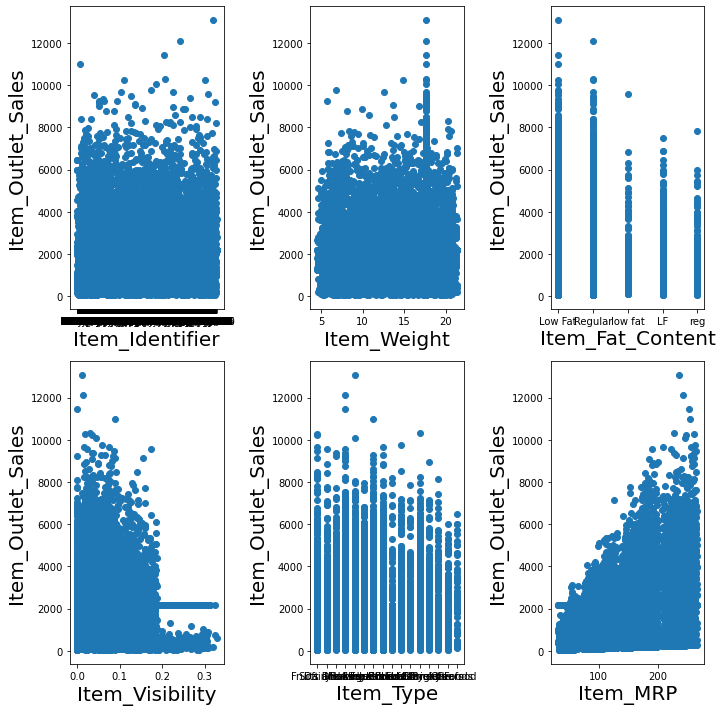

In [15]:
plt.figure(figsize=(10,10),facecolor='white')
plotnumber = 1
for columns in data:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        plt.scatter(data[columns],ynew)
        plt.xlabel(columns,fontsize=20)
        plt.ylabel('Item_Outlet_Sales',fontsize=20)
    plotnumber += 1
    plt.tight_layout()

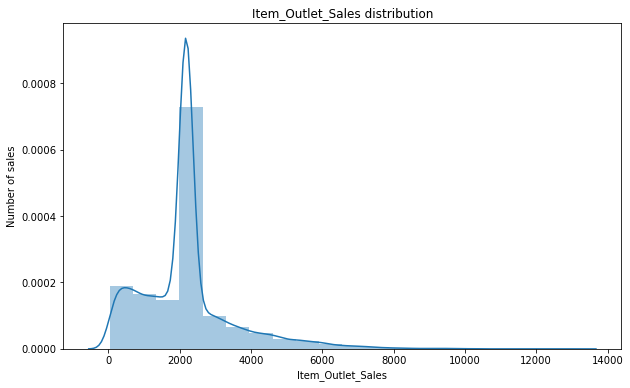

In [16]:
plt.figure(figsize=(10,6))
sns.distplot(data.Item_Outlet_Sales,bins=20)
plt.ticklabel_format(style='plain',axis='x',scilimits=(0,1))
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Number of sales')
plt.title('Item_Outlet_Sales distribution')
plt.show()

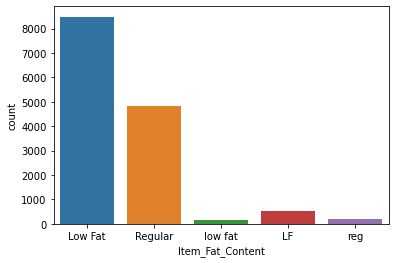

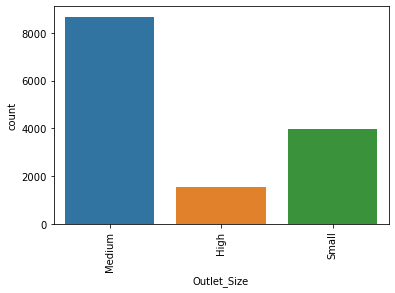

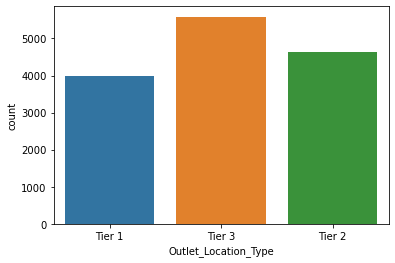

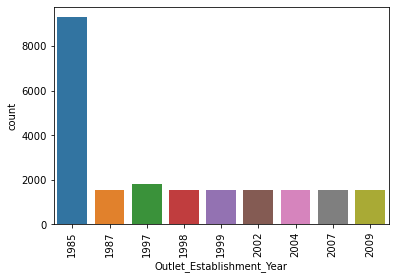

In [17]:
sns.countplot(data.Item_Fat_Content)
plt.show()
sns.countplot(data.Item_Type)
plt.xticks(rotation=90)
sns.countplot(data.Outlet_Size)
plt.show()
sns.countplot(data.Outlet_Location_Type)
plt.show()
sns.countplot(data.Outlet_Type)
plt.xticks(rotation=90)
sns.countplot(data.Outlet_Establishment_Year)
plt.show()

In [18]:
x=data.iloc[:,1:-1]
y=data.iloc[:,-1]

In [19]:
x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...,...,...,...
14199,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
14200,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
14201,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1
14202,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1


In [20]:
y

0        3735.138000
1         443.422800
2        2097.270000
3         732.380000
4         994.705200
            ...     
14199    2181.288914
14200    2181.288914
14201    2181.288914
14202    2181.288914
14203    2181.288914
Name: Item_Outlet_Sales, Length: 14204, dtype: float64

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
labenc_x=LabelEncoder()

In [23]:
x['Item_Fat_Content']=labenc_x.fit_transform(x['Item_Fat_Content'])
x['Item_Type']=labenc_x.fit_transform(x['Item_Type'])
x['Outlet_Identifier']=labenc_x.fit_transform(x['Outlet_Identifier'])
x['Outlet_Size']=labenc_x.fit_transform(x['Outlet_Size'])
x['Outlet_Location_Type']=labenc_x.fit_transform(x['Outlet_Location_Type'])
x['Outlet_Type']=labenc_x.fit_transform(x['Outlet_Type'])

In [24]:
x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,1,0.016047,4,249.8092,9,1999,1,0,1
1,5.92,2,0.019278,14,48.2692,3,2009,1,2,2
2,17.50,1,0.016760,10,141.6180,9,1999,1,0,1
3,19.20,2,0.000000,6,182.0950,0,1998,1,2,0
4,8.93,1,0.000000,9,53.8614,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...
14199,10.50,2,0.013496,13,141.3154,8,1997,2,0,1
14200,7.60,2,0.142991,15,169.1448,3,2009,1,2,2
14201,10.00,1,0.073529,8,118.7440,7,2002,1,1,1
14202,15.30,2,0.000000,3,214.6218,2,2007,1,1,1


In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,-0.937563,-0.573814,-0.969852,-0.766467,1.752511,1.507764,0.139681,-0.284644,-1.369286,-0.252702
1,-1.671409,0.980726,-0.907063,1.606957,-1.493696,-0.607145,1.334228,-0.284644,1.091566,1.002766
2,0.842771,-0.573814,-0.956000,0.657587,0.009874,1.507764,0.139681,-0.284644,-1.369286,-0.252702
3,1.211865,0.980726,-1.281712,-0.291782,0.661838,-1.664600,0.020226,-0.284644,1.091566,-1.508171
4,-1.017896,-0.573814,-1.281712,0.420245,-1.403623,-1.312115,-1.293777,-1.950518,1.091566,-0.252702
...,...,...,...,...,...,...,...,...,...,...
14199,-0.677027,0.980726,-1.019425,1.369614,0.005000,1.155279,-0.099229,1.381231,-1.369286,-0.252702
14200,-1.306657,0.980726,1.497142,1.844299,0.453249,-0.607145,1.334228,-0.284644,1.091566,1.002766
14201,-0.785584,-0.573814,0.147226,0.182903,-0.358558,0.802794,0.498045,-0.284644,-0.138860,-0.252702
14202,0.365121,0.980726,-1.281712,-1.003809,1.185747,-0.959630,1.095319,-0.284644,-0.138860,-0.252702


In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=21)

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [28]:
def reg(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=21)
    
    model.fit(x_train, y_train)
    
    pred = model.predict(x_test)
    
    rmse = mean_squared_error(y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    r2 = r2_score(y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    cv_score = (cross_val_score(model, x, y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

In [29]:
model=LinearRegression()
reg(model, x, y)

RMSE Score is: 1121.7548738590747
R2 Score is: 30.69526377615971
Cross Validation Score: -1.616948844626013e+32
R2 Score - Cross Validation Score is 1.616948844626013e+32


In [30]:
model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
reg(model, x, y)

RMSE Score is: 1327.8958884218825
R2 Score is: 2.8830494935817685
Cross Validation Score: -9.234760445369586e+30
R2 Score - Cross Validation Score is 9.234760445369586e+30


In [31]:
model=DecisionTreeRegressor(criterion="poisson", random_state=111)
reg(model, x, y)

RMSE Score is: 1552.9948155505842
R2 Score is: -32.833310517625634
Cross Validation Score: -4.595965247023858e+32
R2 Score - Cross Validation Score is 4.595965247023858e+32


In [32]:
model=RandomForestRegressor(max_depth=2, max_features="sqrt")
reg(model, x, y)

RMSE Score is: 1196.8363015401515
R2 Score is: 21.107359589921337
Cross Validation Score: -3.9851150945080515e+31
R2 Score - Cross Validation Score is 3.9851150945080515e+31


In [33]:
KNeighborsRegressor(n_neighbors=2, algorithm="kd_tree")
reg(model, x, y)

RMSE Score is: 1184.179608430325
R2 Score is: 22.76713578587205
Cross Validation Score: -3.7718835658004723e+31
R2 Score - Cross Validation Score is 3.7718835658004723e+31


In [34]:
from sklearn.ensemble import GradientBoostingRegressor
model=GradientBoostingRegressor(loss='quantile', n_estimators=200,max_depth=5)
reg(model, x, y)

RMSE Score is: 1779.0576328468524
R2 Score is: -74.31992055494511
Cross Validation Score: -7.913877686535875e+32
R2 Score - Cross Validation Score is 7.913877686535875e+32


In [36]:
y_pred=model.predict(x_test)

In [37]:
y_pred

array([2181.28891467, 3503.78233905, 3508.6117091 , ..., 2181.28891467,
       2261.46312565, 2195.66696535])